OpenClassrooms
Project 4, Data Scientist
Author : Oumeima EL GHARBI
Date : August,September 2022

# Feature Engineering to predict CO2

### Introduction

#### Importing libraries

In [143]:
%reset -f

import pickle

import warnings
warnings.filterwarnings(action="ignore")

from exploration import *

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [144]:
# Heure démarrage
t0 = time()

# seed pour les générateurs aléatoires
seed = 1
print("Seed value: ", seed)

Seed value:  1


In [145]:
all_energy_dir = ["total_energy"]
#all_energy_dir = ["electricity", "steam", "gas", "steam_gas"]
#all_energy_names = ["Ratio_Electricity","Ratio_Steam", "Ratio_Gas",  "Ratio_Steam+Gas"]

all_energy_names = ["Log-TotalEnergy(kBtu)"]

experiment_dir = "./Experiment_3_final_predictions/"
path_energy = "dataset/energy/"

#### Loading dataset

In [146]:
train_energy_file = path_energy + "train_energy.csv"
test_energy_file =  path_energy + "test_energy.csv"

train_energy = pd.read_csv(train_energy_file, sep=",")
test_energy = pd.read_csv(test_energy_file, sep=",")

dataset = pd.concat([train_energy, test_energy], ignore_index=True) # reindexation

In [147]:
dataset

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Log-TotalEnergy(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,ENERGYSTARScore,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1927,15.793246,0.546060,0.277302,0.176638,0.453940,4.539401e-01,60.0,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.153810,1996,15.942305,0.386609,0.000000,0.613391,0.613391,6.133909e-01,61.0,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1969,18.100297,0.682307,0.297113,0.020579,0.317693,3.176926e-01,43.0,7.645053
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1999,16.307609,0.609884,0.000000,0.390116,0.390116,3.901160e-01,NaN,5.713106
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1926,15.655764,0.577418,0.361423,0.061159,0.422582,4.225819e-01,NaN,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.439239,2015,15.696876,0.472329,0.000000,0.527671,0.527671,5.276708e-01,100.0,5.330397
3143,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.780089,2015,14.586193,1.000000,0.000000,0.000000,0.000000,1.156743e-07,84.0,2.776954
3144,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.044854,2015,17.488365,0.600466,0.000000,0.399534,0.399534,3.995342e-01,NaN,6.908815
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,2015,15.083074,0.559873,0.000000,0.440127,0.440127,4.401271e-01,100.0,4.583947


In [148]:
dataset_energy = dataset.iloc[:, :-8] # -8 for exp 3 ; -6 for exp 1 ; -7 for exp 2

In [149]:
dataset_energy.shape

(3147, 50)

In [150]:
dataset_energy.columns

Index(['Neighborhood_Ballard', 'Neighborhood_Central', 'Neighborhood_Delridge',
       'Neighborhood_Downtown', 'Neighborhood_East',
       'Neighborhood_Greater duwamish', 'Neighborhood_Lake union',
       'Neighborhood_Magnolia / queen anne', 'Neighborhood_North',
       'Neighborhood_Northeast', 'Neighborhood_Northwest',
       'Neighborhood_Southeast', 'Neighborhood_Southwest',
       'BuildingType_Campus', 'BuildingType_Multifamily hr (10+)',
       'BuildingType_Multifamily lr (1-4)',
       'BuildingType_Multifamily mr (5-9)', 'BuildingType_Nonresidential',
       'BuildingType_Nonresidential cos', 'BuildingType_Sps-district k-12',
       'PrimaryPropertyType_Distribution center',
       'PrimaryPropertyType_High-rise multifamily',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 school', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large office',
       'PrimaryPropertyType_Low-rise multifamily',
       'Prima

In [151]:
dataset

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Log-TotalEnergy(kBtu),Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,ENERGYSTARScore,Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1927,15.793246,0.546060,0.277302,0.176638,0.453940,4.539401e-01,60.0,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.153810,1996,15.942305,0.386609,0.000000,0.613391,0.613391,6.133909e-01,61.0,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1969,18.100297,0.682307,0.297113,0.020579,0.317693,3.176926e-01,43.0,7.645053
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1999,16.307609,0.609884,0.000000,0.390116,0.390116,3.901160e-01,NaN,5.713106
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1926,15.655764,0.577418,0.361423,0.061159,0.422582,4.225819e-01,NaN,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.439239,2015,15.696876,0.472329,0.000000,0.527671,0.527671,5.276708e-01,100.0,5.330397
3143,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.780089,2015,14.586193,1.000000,0.000000,0.000000,0.000000,1.156743e-07,84.0,2.776954
3144,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.044854,2015,17.488365,0.600466,0.000000,0.399534,0.399534,3.995342e-01,NaN,6.908815
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,2015,15.083074,0.559873,0.000000,0.440127,0.440127,4.401271e-01,100.0,4.583947


### 1) Predict each energy

In [152]:

def predict_energies(df_energy, list_energy_dir):
    """

    """
    for index, energy_dir in enumerate(list_energy_dir):

        # we load each best model for each energy features
        filename = 'model/{}/best_model_{}.sav'.format(energy_dir, energy_dir)
        best_model_energy = pickle.load(open(filename, 'rb'))

        y_pred_energy = best_model_energy.predict(df_energy)
        series_y_pred = pd.Series(y_pred_energy)
        # we put into one Series the prediction of the train set and test set
        df_pred = pd.DataFrame(series_y_pred, columns=[all_energy_names[index]])

        print("Step :", index, energy_dir)
        #display(df_pred) # OK

        if index == 0:
            df_energy_after = pd.DataFrame({})
        df_energy_after = pd.concat([df_energy_after, df_pred], axis=1)

    display(df_energy_after)
    return df_energy_after

dataset_predicted_energies = predict_energies(dataset_energy, all_energy_dir)

Step : 0 total_energy


,Log-TotalEnergy(kBtu)
0,15.895193
1,15.710253
2,18.056078
3,16.020353
4,15.950182
...,...
3142,15.324675
3143,14.759732
3144,17.094656
3145,15.337204


In [153]:
#dataset["Log-TotalGHGEmissions"].index.unique()

In [154]:
#dataset_predicted_energies.index

In [155]:
dataset_CO2 = pd.concat([dataset.iloc[:, :-8], dataset.iloc[:, -7:-1], dataset_predicted_energies, dataset.iloc[:, -1]], axis=1)

display(dataset_CO2)

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,ENERGYSTARScore,Log-TotalEnergy(kBtu),Log-TotalGHGEmissions
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1927,0.546060,0.277302,0.176638,0.453940,4.539401e-01,60.0,15.895193,5.525373
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.153810,1996,0.386609,0.000000,0.613391,0.613391,6.133909e-01,61.0,15.710253,5.693261
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1969,0.682307,0.297113,0.020579,0.317693,3.176926e-01,43.0,18.056078,7.645053
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1999,0.609884,0.000000,0.390116,0.390116,3.901160e-01,NaN,16.020353,5.713106
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1926,0.577418,0.361423,0.061159,0.422582,4.225819e-01,NaN,15.950182,5.404972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.439239,2015,0.472329,0.000000,0.527671,0.527671,5.276708e-01,100.0,15.324675,5.330397
3143,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.780089,2015,1.000000,0.000000,0.000000,0.000000,1.156743e-07,84.0,14.759732,2.776954
3144,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.044854,2015,0.600466,0.000000,0.399534,0.399534,3.995342e-01,NaN,17.094656,6.908815
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,2015,0.559873,0.000000,0.440127,0.440127,4.401271e-01,100.0,15.337204,4.583947


### 2) Preparing dataset CO2 without ENERGYSTARScore

#### 1) Selection of features

In [156]:
# liste des variables et étiquettes
model_CO2_target = ['Log-TotalGHGEmissions']
model_CO2_features = dataset_CO2.columns.tolist()[:-1]
model_CO2_features.remove("ENERGYSTARScore")
#model_CO2_features = ['Log-SteamUse(kBtu)', 'Log-Electricity(kBtu)', 'Log-NaturalGas(kBtu)', 'Log-TotalEnergy(kBtu)']
model_CO2 = model_CO2_features + model_CO2_target

model_CO2

['Neighborhood_Ballard',
 'Neighborhood_Central',
 'Neighborhood_Delridge',
 'Neighborhood_Downtown',
 'Neighborhood_East',
 'Neighborhood_Greater duwamish',
 'Neighborhood_Lake union',
 'Neighborhood_Magnolia / queen anne',
 'Neighborhood_North',
 'Neighborhood_Northeast',
 'Neighborhood_Northwest',
 'Neighborhood_Southeast',
 'Neighborhood_Southwest',
 'BuildingType_Campus',
 'BuildingType_Multifamily hr (10+)',
 'BuildingType_Multifamily lr (1-4)',
 'BuildingType_Multifamily mr (5-9)',
 'BuildingType_Nonresidential',
 'BuildingType_Nonresidential cos',
 'BuildingType_Sps-district k-12',
 'PrimaryPropertyType_Distribution center',
 'PrimaryPropertyType_High-rise multifamily',
 'PrimaryPropertyType_Hospital',
 'PrimaryPropertyType_Hotel',
 'PrimaryPropertyType_K-12 school',
 'PrimaryPropertyType_Laboratory',
 'PrimaryPropertyType_Large office',
 'PrimaryPropertyType_Low-rise multifamily',
 'PrimaryPropertyType_Medical office',
 'PrimaryPropertyType_Mid-rise multifamily',
 'PrimaryProp

#### 2) Separation train and test dataset


In [157]:
# We create a training set and a test set (the test set contains 30% of the dataset)
train_common, test_common = train_test_split(dataset_CO2, test_size=0.3,  random_state=seed)

train_common

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,ENERGYSTARScore,Log-TotalEnergy(kBtu),Log-TotalGHGEmissions
1008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1990,1.000000,0.0,0.000000,0.000000,3.993639e-07,60.0,13.547426,1.865629
1784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.439239,1954,0.469661,0.0,0.530340,0.530340,5.303392e-01,90.0,13.378095,3.089223
1563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.439239,1985,1.000000,0.0,0.000000,0.000000,1.420960e-07,98.0,14.555510,2.585506
452,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1917,0.758858,0.0,0.241141,0.241141,2.411416e-01,NaN,13.874565,3.421653
1561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.439239,1988,1.000000,0.0,0.000000,0.000000,1.793910e-07,82.0,13.492342,1.536867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1907,0.691415,0.0,0.308585,0.308585,3.085848e-01,47.0,14.113312,3.639689
905,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.439239,1964,0.999999,0.0,0.000000,0.000000,1.072840e-06,53.0,13.880654,1.291984
1096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.439239,1929,0.561847,0.0,0.438153,0.438153,4.381528e-01,63.0,14.301472,3.507058
235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.439239,1940,0.834923,0.0,0.165076,0.165076,1.650767e-01,NaN,15.172963,4.321613


In [158]:
# Selection des variables pour modélisation CO2
train_CO2, test_CO2 = train_common[model_CO2], test_common[model_CO2]

In [159]:
train_CO2

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalEnergy(kBtu),Log-TotalGHGEmissions
1008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1990,1.000000,0.0,0.000000,0.000000,3.993639e-07,13.547426,1.865629
1784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.923528,-0.439239,1954,0.469661,0.0,0.530340,0.530340,5.303392e-01,13.378095,3.089223
1563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.923528,-0.439239,1985,1.000000,0.0,0.000000,0.000000,1.420960e-07,14.555510,2.585506
452,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.919706,-0.439239,1917,0.758858,0.0,0.241141,0.241141,2.411416e-01,13.874565,3.421653
1561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.923528,-0.439239,1988,1.000000,0.0,0.000000,0.000000,1.793910e-07,13.492342,1.536867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.941569,-0.439239,1907,0.691415,0.0,0.308585,0.308585,3.085848e-01,14.113312,3.639689
905,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1964,0.999999,0.0,0.000000,0.000000,1.072840e-06,13.880654,1.291984
1096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.923528,-0.439239,1929,0.561847,0.0,0.438153,0.438153,4.381528e-01,14.301472,3.507058
235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.017233,-0.439239,1940,0.834923,0.0,0.165076,0.165076,1.650767e-01,15.172963,4.321613


#### 3) Standardization of numerical variables

In [160]:
model_CO2_features_std = ["Ratio_Electricity", "Ratio_Steam", "Ratio_Gas", "Ratio_Steam+Gas", "Ratio_Steam+Gas+Other", "Log-TotalEnergy(kBtu)"]

train_CO2[model_CO2_features_std]

,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalEnergy(kBtu)
1008,1.000000,0.0,0.000000,0.000000,3.993639e-07,13.547426
1784,0.469661,0.0,0.530340,0.530340,5.303392e-01,13.378095
1563,1.000000,0.0,0.000000,0.000000,1.420960e-07,14.555510
452,0.758858,0.0,0.241141,0.241141,2.411416e-01,13.874565
1561,1.000000,0.0,0.000000,0.000000,1.793910e-07,13.492342
...,...,...,...,...,...,...
2763,0.691415,0.0,0.308585,0.308585,3.085848e-01,14.113312
905,0.999999,0.0,0.000000,0.000000,1.072840e-06,13.880654
1096,0.561847,0.0,0.438153,0.438153,4.381528e-01,14.301472
235,0.834923,0.0,0.165076,0.165076,1.650767e-01,15.172963


In [161]:
# We train / fit the scaler on the training set / Computes the mean and std to be used for later scaling.
std_scaler_CO2 = StandardScaler().fit(train_CO2[model_CO2_features_std])
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_CO2_std, test_CO2_std = train_CO2.copy(), test_CO2.copy()

train_CO2_std[model_CO2_features_std] = std_scaler_CO2.transform(train_CO2[model_CO2_features_std])
test_CO2_std[model_CO2_features_std] = std_scaler_CO2.transform(test_CO2[model_CO2_features_std])

In [162]:
print("Before")
display(train_CO2)
print("After")
display(train_CO2_std)

Before


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalEnergy(kBtu),Log-TotalGHGEmissions
1008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1990,1.000000,0.0,0.000000,0.000000,3.993639e-07,13.547426,1.865629
1784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.923528,-0.439239,1954,0.469661,0.0,0.530340,0.530340,5.303392e-01,13.378095,3.089223
1563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.923528,-0.439239,1985,1.000000,0.0,0.000000,0.000000,1.420960e-07,14.555510,2.585506
452,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.919706,-0.439239,1917,0.758858,0.0,0.241141,0.241141,2.411416e-01,13.874565,3.421653
1561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.923528,-0.439239,1988,1.000000,0.0,0.000000,0.000000,1.793910e-07,13.492342,1.536867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.941569,-0.439239,1907,0.691415,0.0,0.308585,0.308585,3.085848e-01,14.113312,3.639689
905,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1964,0.999999,0.0,0.000000,0.000000,1.072840e-06,13.880654,1.291984
1096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.923528,-0.439239,1929,0.561847,0.0,0.438153,0.438153,4.381528e-01,14.301472,3.507058
235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.017233,-0.439239,1940,0.834923,0.0,0.165076,0.165076,1.650767e-01,15.172963,4.321613


After


,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-SecondLargestPropertyUseTypeGFA,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalEnergy(kBtu),Log-TotalGHGEmissions
1008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1990,0.968885,-0.166239,-0.932205,-0.968852,-0.968885,-0.999833,1.865629
1784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.923528,-0.439239,1954,-0.978452,-0.166239,1.019114,0.978477,0.978452,-1.161182,3.089223
1563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.923528,-0.439239,1985,0.968886,-0.166239,-0.932205,-0.968852,-0.968886,-0.039272,2.585506
452,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.919706,-0.439239,1917,0.083445,-0.166239,-0.044955,-0.083416,-0.083445,-0.688116,3.421653
1561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.923528,-0.439239,1988,0.968886,-0.166239,-0.932205,-0.968852,-0.968886,-1.052320,1.536867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.941569,-0.439239,1907,-0.164198,-0.166239,0.203193,0.164225,0.164198,-0.460624,3.639689
905,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.923528,-0.439239,1964,0.968883,-0.166239,-0.932205,-0.968852,-0.968883,-0.682313,1.291984
1096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.923528,-0.439239,1929,-0.639956,-0.166239,0.679924,0.639981,0.639956,-0.281334,3.507058
235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.017233,-0.439239,1940,0.362746,-0.166239,-0.324827,-0.362715,-0.362746,0.549074,4.321613


#### 4) Distribution of variables

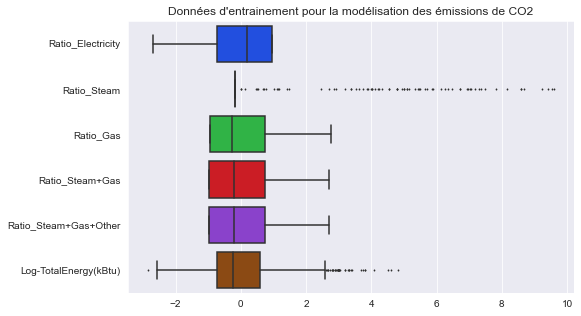

In [163]:
# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(8,5))
plt.title('Données d\'entrainement pour la modélisation des émissions de CO2')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_CO2_std[model_CO2_features_std]), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

#### 5) Saving dataset

In [164]:
path_save_CO2 = "dataset/CO2/"

# Sauvegarde des jeux de données
train_CO2_std.to_csv("{}{}".format(path_save_CO2, "train_CO2.csv"), encoding='utf-8', index=False)
test_CO2_std.to_csv("{}{}".format(path_save_CO2, "test_CO2.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_CO2, 'scaler_features': model_CO2_features}
filename = 'model/scaler_CO2.sav'
pickle.dump(model, open(filename, 'wb'))

### 3) Preparing dataset CO2 with ENERGYSTARScore

#### 1) Selection of features

In [165]:
# Liste des variables et étiquettes pour la modélisation
model_EnergyStarScore_target = ['Log-TotalGHGEmissions']
model_EnergyStarScore_features = model_CO2_features + ['ENERGYSTARScore']
model_EnergyStarScore = model_EnergyStarScore_features + model_EnergyStarScore_target

model_EnergyStarScore

['Neighborhood_Ballard',
 'Neighborhood_Central',
 'Neighborhood_Delridge',
 'Neighborhood_Downtown',
 'Neighborhood_East',
 'Neighborhood_Greater duwamish',
 'Neighborhood_Lake union',
 'Neighborhood_Magnolia / queen anne',
 'Neighborhood_North',
 'Neighborhood_Northeast',
 'Neighborhood_Northwest',
 'Neighborhood_Southeast',
 'Neighborhood_Southwest',
 'BuildingType_Campus',
 'BuildingType_Multifamily hr (10+)',
 'BuildingType_Multifamily lr (1-4)',
 'BuildingType_Multifamily mr (5-9)',
 'BuildingType_Nonresidential',
 'BuildingType_Nonresidential cos',
 'BuildingType_Sps-district k-12',
 'PrimaryPropertyType_Distribution center',
 'PrimaryPropertyType_High-rise multifamily',
 'PrimaryPropertyType_Hospital',
 'PrimaryPropertyType_Hotel',
 'PrimaryPropertyType_K-12 school',
 'PrimaryPropertyType_Laboratory',
 'PrimaryPropertyType_Large office',
 'PrimaryPropertyType_Low-rise multifamily',
 'PrimaryPropertyType_Medical office',
 'PrimaryPropertyType_Mid-rise multifamily',
 'PrimaryProp

#### 2) Separation train and test dataset


In [166]:
# we drop the buildings for which the EnergyStarScore is missing
dataset_clean = dataset_CO2.dropna(axis=0)

train_clean, test_clean = train_test_split(dataset_clean, test_size=0.3, random_state=seed)

train_clean

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,ENERGYSTARScore,Log-TotalEnergy(kBtu),Log-TotalGHGEmissions
920,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.439239,2009,0.550123,0.0,0.449877,0.449877,4.498773e-01,89.0,15.942636,5.486414
2752,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1957,0.552604,0.0,0.447396,0.447396,4.473962e-01,52.0,13.320335,3.322515
478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.439239,1984,1.000000,0.0,0.000000,0.000000,-7.460411e-08,59.0,14.295299,2.540026
679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.439239,1910,0.572266,0.0,0.427735,0.427735,4.277344e-01,92.0,13.732145,3.033028
147,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.598793,1976,1.000000,0.0,0.000000,0.000000,1.237624e-07,69.0,17.631159,5.825912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.439239,1968,0.999999,0.0,0.000000,0.000000,6.266929e-07,77.0,13.302039,1.499623
1219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.439239,1979,0.087370,0.0,0.912630,0.912630,9.126299e-01,100.0,14.407993,4.120175
1483,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1928,0.169051,0.0,0.830949,0.830949,8.309491e-01,80.0,13.773218,3.884446
330,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1910,0.689684,0.0,0.310316,0.310316,3.103158e-01,89.0,15.191804,4.248781


In [167]:
# Selection des variables pour modélisation CO2
train_EnergyStarScore, test_EnergyStarScore = train_clean[model_EnergyStarScore], test_clean[model_EnergyStarScore]

In [168]:
train_EnergyStarScore

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalEnergy(kBtu),ENERGYSTARScore,Log-TotalGHGEmissions
920,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.439239,2009,0.550123,0.0,0.449877,0.449877,4.498773e-01,15.942636,89.0,5.486414
2752,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1957,0.552604,0.0,0.447396,0.447396,4.473962e-01,13.320335,52.0,3.322515
478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.439239,1984,1.000000,0.0,0.000000,0.000000,-7.460411e-08,14.295299,59.0,2.540026
679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.439239,1910,0.572266,0.0,0.427735,0.427735,4.277344e-01,13.732145,92.0,3.033028
147,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.598793,1976,1.000000,0.0,0.000000,0.000000,1.237624e-07,17.631159,69.0,5.825912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.439239,1968,0.999999,0.0,0.000000,0.000000,6.266929e-07,13.302039,77.0,1.499623
1219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.439239,1979,0.087370,0.0,0.912630,0.912630,9.126299e-01,14.407993,100.0,4.120175
1483,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1928,0.169051,0.0,0.830949,0.830949,8.309491e-01,13.773218,80.0,3.884446
330,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1910,0.689684,0.0,0.310316,0.310316,3.103158e-01,15.191804,89.0,4.248781


#### 3) Standardization of numerical variables

In [169]:
model_EnergyStarScore_features_std = ["Ratio_Electricity", "Ratio_Steam", "Ratio_Gas", "Ratio_Steam+Gas", "Ratio_Steam+Gas+Other", "Log-TotalEnergy(kBtu)", "ENERGYSTARScore"]

In [170]:
# We transform the training set and the testing set / Performs standardization by centering and scaling.
train_EnergyStarScore_std, test_EnergyStarScore_std = train_EnergyStarScore.copy(), test_EnergyStarScore.copy()

std_scaler_EnergyStarScore = StandardScaler()  # other way of writing the scaling
train_EnergyStarScore_std[model_EnergyStarScore_features_std] = std_scaler_EnergyStarScore.fit_transform(
    train_EnergyStarScore[model_EnergyStarScore_features_std])

test_EnergyStarScore_std[model_EnergyStarScore_features_std] = std_scaler_EnergyStarScore.transform(
    test_EnergyStarScore[model_EnergyStarScore_features_std])

In [171]:
train_EnergyStarScore_std

,Neighborhood_Ballard,Neighborhood_Central,Neighborhood_Delridge,Neighborhood_Downtown,Neighborhood_East,Neighborhood_Greater duwamish,Neighborhood_Lake union,Neighborhood_Magnolia / queen anne,Neighborhood_North,Neighborhood_Northeast,...,Log-ThirdLargestPropertyUseTypeGFA,YearBuilt,Ratio_Electricity,Ratio_Steam,Ratio_Gas,Ratio_Steam+Gas,Ratio_Steam+Gas+Other,Log-TotalEnergy(kBtu),ENERGYSTARScore,Log-TotalGHGEmissions
920,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.439239,2009,-0.749204,-0.177668,0.802209,0.749211,0.749204,1.266266,0.804084,5.486414
2752,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1957,-0.740022,-0.177668,0.792966,0.740029,0.740022,-1.235245,-0.579475,3.322515
478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.439239,1984,0.915641,-0.177668,-0.873480,-0.915639,-0.915641,-0.305191,-0.317721,2.540026
679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.439239,1910,-0.667260,-0.177668,0.719733,0.667269,0.667260,-0.842404,0.916265,3.033028
147,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.598793,1976,0.915640,-0.177668,-0.873480,-0.915639,-0.915640,2.877011,0.056214,5.825912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.439239,1968,0.915638,-0.177668,-0.873480,-0.915639,-0.915638,-1.252698,0.355362,1.499623
1219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.439239,1979,-2.461696,-0.177668,2.525857,2.461711,2.461696,-0.197687,1.215413,4.120175
1483,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1928,-2.159422,-0.177668,2.221612,2.159434,2.159422,-0.803223,0.467543,3.884446
330,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439239,1910,-0.232734,-0.177668,0.282375,0.232740,0.232734,0.550019,0.804084,4.248781


#### 4) Distribution of variables

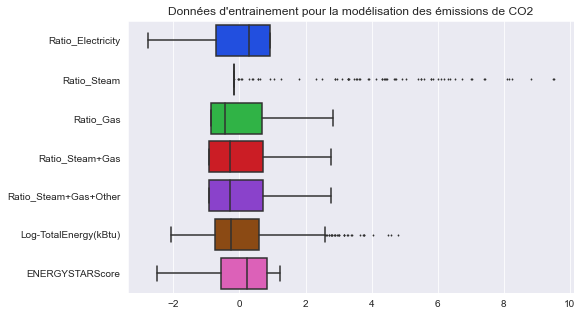

In [172]:
# Distribution des variables du jeu d'entrainement
plt.figure(figsize=(8,5))
plt.title('Données d\'entrainement pour la modélisation des émissions de CO2')
bp = sns.boxplot(x='value', y='variable', data=pd.melt(train_EnergyStarScore_std[model_EnergyStarScore_features_std]), palette='bright',
                 flierprops=dict(markersize=1, markerfacecolor='gray'))
bp.set_xlabel("")
bp.set_ylabel("")
plt.show()

#### 5) Saving dataset

In [173]:
path_save_EnergyStarScore = "dataset/CO2_EnergyStarScore/"

# Sauvegarde des jeux de données
train_EnergyStarScore_std.to_csv("{}{}".format(path_save_EnergyStarScore, "train_EnergyStarScore.csv"), encoding='utf-8', index=False)
test_EnergyStarScore_std.to_csv("{}{}".format(path_save_EnergyStarScore, "test_EnergyStarScore.csv"), encoding='utf-8', index=False)

# Sauvegarde du modèle pour standardiser
model = {'scaler': std_scaler_EnergyStarScore, 'scaler_features': model_EnergyStarScore_features}
filename = 'model/scaler_EnergyStarScore.sav'
pickle.dump(model, open(filename, 'wb'))

In [174]:
t1 = time()
print("computing time : {:8.6f} sec".format(t1-t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1-t0)))

computing time : 1.654256 sec
computing time : 00:00:01
